$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge Nº1 | Visualización y pre-procesamiento de datos}$$


- _Jesus Alvarado H._

# A. Introducción

En este taller abordaremos algunas herramientas importantes en la evaluación de datasets moleculares. Iniciaremos por la disponibilidad de los datos (sin profundizar en el filtrado y generación de descriptores), importancia del fenómeno en estudio y la problemática asociada, para luego realizar un análisis exploratorio y preprocesamiento, finalmente evaluaremos de manera superficial algunas métricas y gráficas. Al final de este notebook se explica con detalle los objetivos del challenge y el entregable.

# B. Problemática y disposición de los datos

Librerías

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Ejemplo 1:

Podemos analizar información de tablas empleando pandas a partir de la URL. Tomemos el siguiente ejemplo (http://dx.doi.org/10.37761/rsqp.v89i1.425):

In [ ]:
pagina = pd.read_html("http://www.scielo.org.pe/scielo.php?script=sci_arttext&pid=S1810-634X2023000100068&lng=es&nrm=iso&tlng=es")

In [ ]:
tabla = pagina[0]
tabla

0                  1                  2  \
0                           NaN           Aluminio              Galio   
1                Número atómico                 13                 31   
2                Abundancia (%)                NaN                NaN   
3                      Universo               0005             1x10-6   
4             Corteza terrestre                 81              00019   
5                       Humanos                  -                  -   
6     Configuración electrónica                NaN                NaN   
7                        Neutro       [Ne] 3s2 3p1  [Ar] 3d10 4s2 4p1   
8        Estado de oxidación 3+               [Ne]          [Ar] 3d10   
9         Electronegatividad de                161                181   
10                      Pauling                NaN                NaN   
11      I1 / I2 / I3 (kJ mol-1)  577 / 1816 / 2744  579 / 1979 / 2963   
12      Conductividad eléctrica            3,8x107            7,1x106   
13                        (S/m)        (conductor)        (conductor)   
14               Tipo magnético      Paramagnético       Diamagnético   
15   Temperatura de fusión (°C)              66032               2976   
16             Densidad (g/cm3)                 27                 59   
17   Potencial de electrodo (V)               -166              -0549   
18        {E°, Me3+ + 3e- → Me}                NaN                NaN   
19      Radio iónico trivalente                054                062   
20                    (Å), NC=6  0,55 d5 spin bajo                NaN   
21  Radio covalente en Me3+ (Å)                118                126   
22        pKa1 del [Me(H2O)6]3+                499                 26   
23            Log Kps [Me(OH)3]               -335                -37   
24            Log β [MeIII-DFO]               3611               3896   

                    3  
0              Hierro  
1                  26  
2                 NaN  
3                 011  
4                  63  
5                0006  
6                 NaN  
7        [Ar] 3d6 4s2  
8            [Ar] 3d5  
9                 183  
10                NaN  
11  762 / 1562 / 2957  
12            1,0x107  
13        (conductor)  
14     Ferromagnético  
15               1538  
16                 78  
17                077  
18        (Fe3+/Fe2+)  
19  0,65 d5 spin alto  
20                NaN  
21                125  
22                 22  
23                -38  
24               4233

In [ ]:
df = tabla.T
df

0               1               2         3                  4   \
0       NaN  Número atómico  Abundancia (%)  Universo  Corteza terrestre   
1  Aluminio              13             NaN      0005                 81   
2     Galio              31             NaN    1x10-6              00019   
3    Hierro              26             NaN       011                 63   

        5                          6                  7   \
0  Humanos  Configuración electrónica             Neutro   
1        -                        NaN       [Ne] 3s2 3p1   
2        -                        NaN  [Ar] 3d10 4s2 4p1   
3     0006                        NaN       [Ar] 3d6 4s2   

                       8                      9   ...  \
0  Estado de oxidación 3+  Electronegatividad de  ...   
1                    [Ne]                    161  ...   
2               [Ar] 3d10                    181  ...   
3                [Ar] 3d5                    183  ...   

                           15                16                          17  \
0  Temperatura de fusión (°C)  Densidad (g/cm3)  Potencial de electrodo (V)   
1                       66032                27                        -166   
2                        2976                59                       -0549   
3                        1538                78                         077   

                      18                       19                 20  \
0  {E°, Me3+ + 3e- → Me}  Radio iónico trivalente          (Å), NC=6   
1                    NaN                      054  0,55 d5 spin bajo   
2                    NaN                      062                NaN   
3            (Fe3+/Fe2+)        0,65 d5 spin alto                NaN   

                            21                     22                 23  \
0  Radio covalente en Me3+ (Å)  pKa1 del [Me(H2O)6]3+  Log Kps [Me(OH)3]   
1                          118                    499               -335   
2                          126                     26                -37   
3                          125                     22                -38   

                  24  
0  Log β [MeIII-DFO]  
1               3611  
2               3896  
3               4233  

[4 rows x 25 columns]

In [ ]:
df.iloc[0,:]

0                             NaN
1                  Número atómico
2                  Abundancia (%)
3                        Universo
4               Corteza terrestre
5                         Humanos
6       Configuración electrónica
7                          Neutro
8          Estado de oxidación 3+
9           Electronegatividad de
10                        Pauling
11        I1 / I2 / I3 (kJ mol-1)
12        Conductividad eléctrica
13                          (S/m)
14                 Tipo magnético
15     Temperatura de fusión (°C)
16               Densidad (g/cm3)
17     Potencial de electrodo (V)
18          {E°, Me3+ + 3e- → Me}
19        Radio iónico trivalente
20                      (Å), NC=6
21    Radio covalente en Me3+ (Å)
22          pKa1 del [Me(H2O)6]3+
23              Log Kps [Me(OH)3]
24              Log β [MeIII-DFO]
Name: 0, dtype: object

In [ ]:
df.iloc[1,1]

'13'

Text(0, 0.5, 'Z')

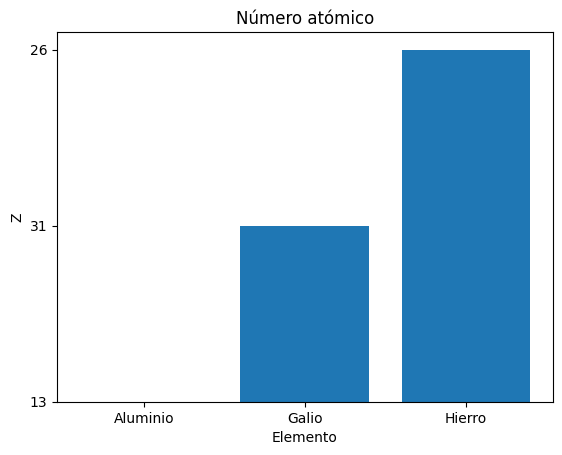

In [ ]:
plt.title("Número atómico")
plt.bar(df.iloc[1:4,0],df.iloc[1:4,1])
plt.xlabel("Elemento")
plt.ylabel("Z")

<BarContainer object of 3 artists>

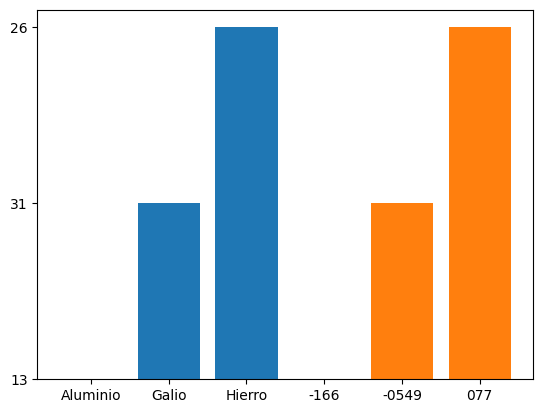

In [ ]:
#plt.title("Número atómico")
plt.bar(df.iloc[1:4,0],df.iloc[1:4,1])
plt.bar(df.iloc[1:4,17],df.iloc[1:4,1])
#plt.xlabel("Elemento")
#plt.ylabel("Z")

<BarContainer object of 3 artists>

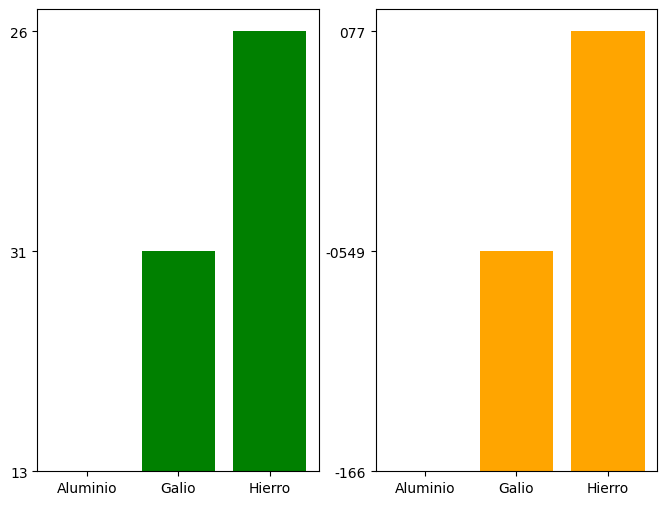

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)

ax[0].bar(df.iloc[1:4,0],df.iloc[1:4,1],color="green")
ax[1].bar(df.iloc[1:4,0],df.iloc[1:4,17],color="orange")

In [ ]:
df.drop(index = 0, inplace= True)
df

0   1    2       3      4     5    6                  7          8   \
1  Aluminio  13  NaN    0005     81     -  NaN       [Ne] 3s2 3p1       [Ne]   
2     Galio  31  NaN  1x10-6  00019     -  NaN  [Ar] 3d10 4s2 4p1  [Ar] 3d10   
3    Hierro  26  NaN     011     63  0006  NaN       [Ar] 3d6 4s2   [Ar] 3d5   

    9   ...     15  16     17           18                 19  \
1  161  ...  66032  27   -166          NaN                054   
2  181  ...   2976  59  -0549          NaN                062   
3  183  ...   1538  78    077  (Fe3+/Fe2+)  0,65 d5 spin alto   

                  20   21   22    23    24  
1  0,55 d5 spin bajo  118  499  -335  3611  
2                NaN  126   26   -37  3896  
3                NaN  125   22   -38  4233  

[3 rows x 25 columns]

## Ejemplo 2:

Queremos disponer de todos los SMILES contenidos en https://perunpdb.com.pe/

In [ ]:
# Realiza web scrapping para obtener estas representaciones moleculares en un dataframe
# https://github.com/inefable12/herramientas_basicas/blob/main/webscrapping2023_Selenium.ipynb

In [ ]:
# SMILES: https://github.com/inefable12/herramientas_basicas/blob/main/perunpdb1.csv
# Matriz X (sideróforos filtrados): https://github.com/inefable12/Exploracion_insilico_2024/blob/main/catecol_complementario/padel_83_1490.csv
# Target Y: https://github.com/inefable12/Exploracion_insilico_2024/blob/main/catecol_complementario/FEB_catechol83.csv

## Ejemplo 3:

A partir de nuestra base de datos formada por compuestos químicos provenientes de 17 plantas de Puno y experimentos in silico (acoplamiento molecular) con una de las proteínas de interés farmacológico en el SARS-CoV-2, la proteasa principal, queremos conocer la distribución de los valores de energía de acoplamiento (docking score) respecto de cada planta en boxplots.

In [ ]:
df0 = pd.read_csv("https://raw.githubusercontent.com/inefable12/upch_rp_2023/main/MDG202_cl2.csv",index_col="CID")
df0.head(3)

NUMBER              PLANT       NAME  \
CID                                             
5280343       1  Baccharis trimera  Quercetin   
5280445       2  Baccharis trimera   Luteolin   
5317284       3  Baccharis trimera    Nepetin   

                                                     IUPAC ISOMERIC_SMILES  \
CID                                                                          
5280343  2- (3,4-dihidroxifenil) -3,5,7-trihidroxicrome...             NaN   
5280445  2- (3,4-dihidroxifenil) -5,7-dihidroxicromen-4...             NaN   
5317284  2- (3,4-dihidroxifenil) -5,7-dihidroxi-6-metox...             NaN   

                                                    SMILES  
CID                                                         
5280343   C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O  
5280445      O=C1C=C(C2=CC=C(O)C(O)=C2)OC3=CC(O)=CC(O)=C13  
5317284  O=C1C=C(C2=CC=C(O)C(O)=C2)OC3=CC(O)=C(OC)C(O)=C13

In [ ]:
df1 = pd.read_csv("https://raw.githubusercontent.com/inefable12/upch_rp_2023/main/mdg_glide_score2023_cl2.csv",index_col="CID",sep=";")
df1.head(3)

docking score
CID                   
5318767         -8.531
5280805         -8.106
5282159         -7.979

In [ ]:
df = df0.merge(df1, how='inner', left_index=True, right_index=True)

In [ ]:
df.shape

(179, 7)

In [ ]:
df['PLANT'].values

array([nan, 'Baccharis latifolia', 'Aloysia triphylla',
       'Buddleja globosa', 'Aloysia triphylla', 'Capsella bursa ',
       'Buddleja globosa', 'Capsella bursa ', 'Capsella bursa ',
       'Buddleja globosa', 'Brugmancia andida', 'Baccharis latifolia',
       'Aloysia triphylla', 'Brugmancia andida', 'Baccharis latifolia',
       'Baccharis latifolia', 'E. tlocktoniae', 'E. maculata',
       'Baccharis latifolia', 'Buddleja globosa', 'Aloysia triphylla',
       'Brugmancia andida', 'Buddleja globosa', 'Minthostachys mollis',
       'Capsella bursa ', 'Baccharis latifolia', 'Buddleja globosa',
       'Buddleja globosa', 'Leucheria daucifolia', 'Brugmancia andida',
       'E. sieberi', 'Aloysia triphylla', 'Brugmancia andida',
       'Brugmancia andida', 'Baccharis latifolia', 'Leucheria daucifolia',
       'Leucheria daucifolia', 'Buddleja globosa', 'Capsella bursa ',
       'Brugmancia andida', 'Aloysia triphylla', 'Buddleja globosa',
       'Bidens andicola', 'Aloysia triphylla'

In [ ]:
df['PLANT'].unique()

array([nan, 'Baccharis latifolia', 'Aloysia triphylla',
       'Buddleja globosa', 'Capsella bursa ', 'Brugmancia andida',
       'E. tlocktoniae', 'E. maculata', 'Minthostachys mollis',
       'Leucheria daucifolia', 'E. sieberi', 'Bidens andicola',
       'Bidens pilosa', 'Cinchona officinalis', 'E. sideroxylon',
       'E. amaldulensis', 'Baccharis trimera', 'E. alophylla'],
      dtype=object)

In [ ]:
df['PLANT'] = np.where(df['PLANT']=='Capsella bursa ','Capsella bursa',df['PLANT'])

In [ ]:
list(df.columns)

['NUMBER',
 'PLANT',
 'NAME',
 'IUPAC',
 'ISOMERIC_SMILES',
 'SMILES',
 'docking score']

In [ ]:
df.drop(['NAME','IUPAC','ISOMERIC_SMILES','NUMBER','SMILES'],inplace=True,axis=1)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(178, 2)

In [ ]:
df

PLANT  docking score
CID                                          
10104370   Baccharis latifolia         -5.407
101629835    Aloysia triphylla         -5.640
10248         Buddleja globosa         -5.577
10398656     Aloysia triphylla         -5.660
10465           Capsella bursa         -1.503
...                        ...            ...
93081         Buddleja globosa         -6.210
932                E. maculata         -7.519
94254         Buddleja globosa         -4.884
971             Capsella bursa         -3.112
985             Capsella bursa         -0.917

[178 rows x 2 columns]

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop_duplicates(subset=['CID'], keep='first', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 177
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CID            140 non-null    object 
 1   PLANT          140 non-null    object 
 2   docking score  140 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.4+ KB


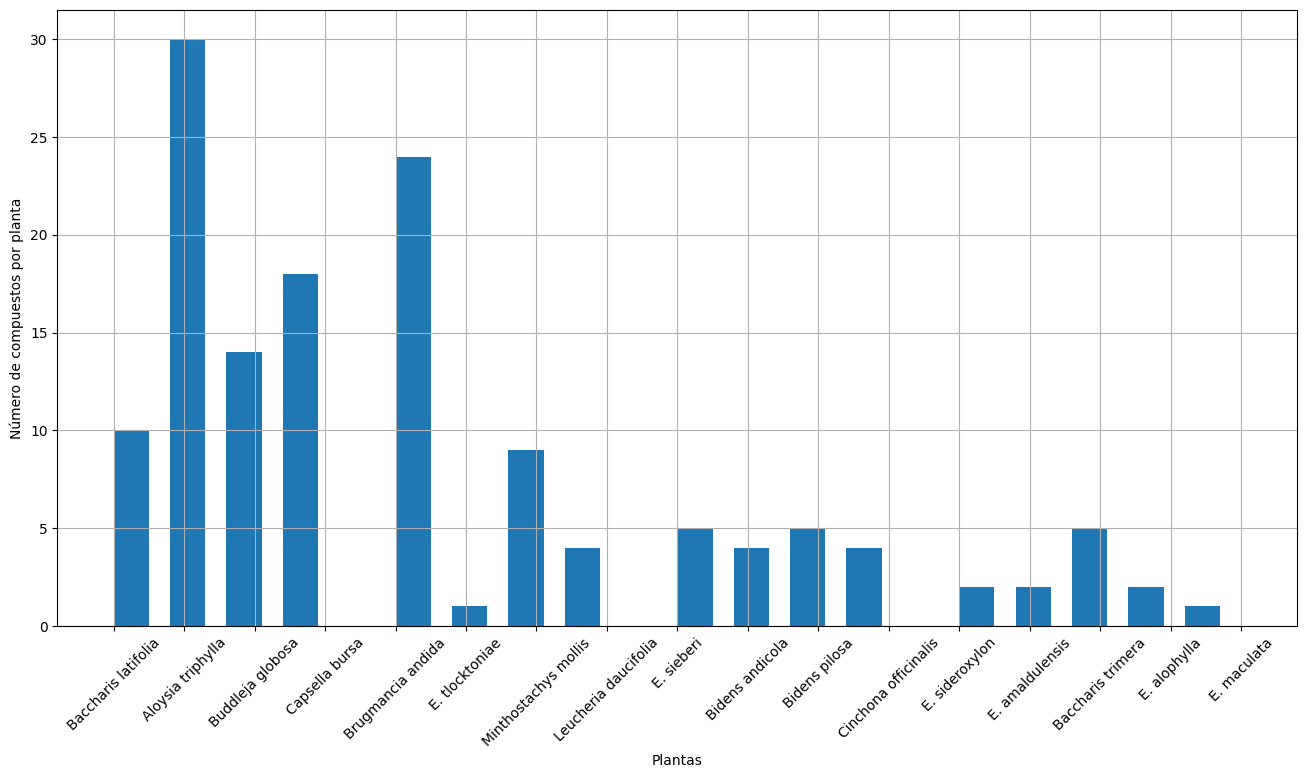

In [ ]:
ax = plt.subplot()
df['PLANT'].hist(figsize=(16,8),bins=20,width=0.5)
plt.xticks(rotation=45)
plt.xlabel('Plantas')
plt.ylabel('Número de compuestos por planta')
plt.show()

<ipython-input-29-d7ba050022b2>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60)


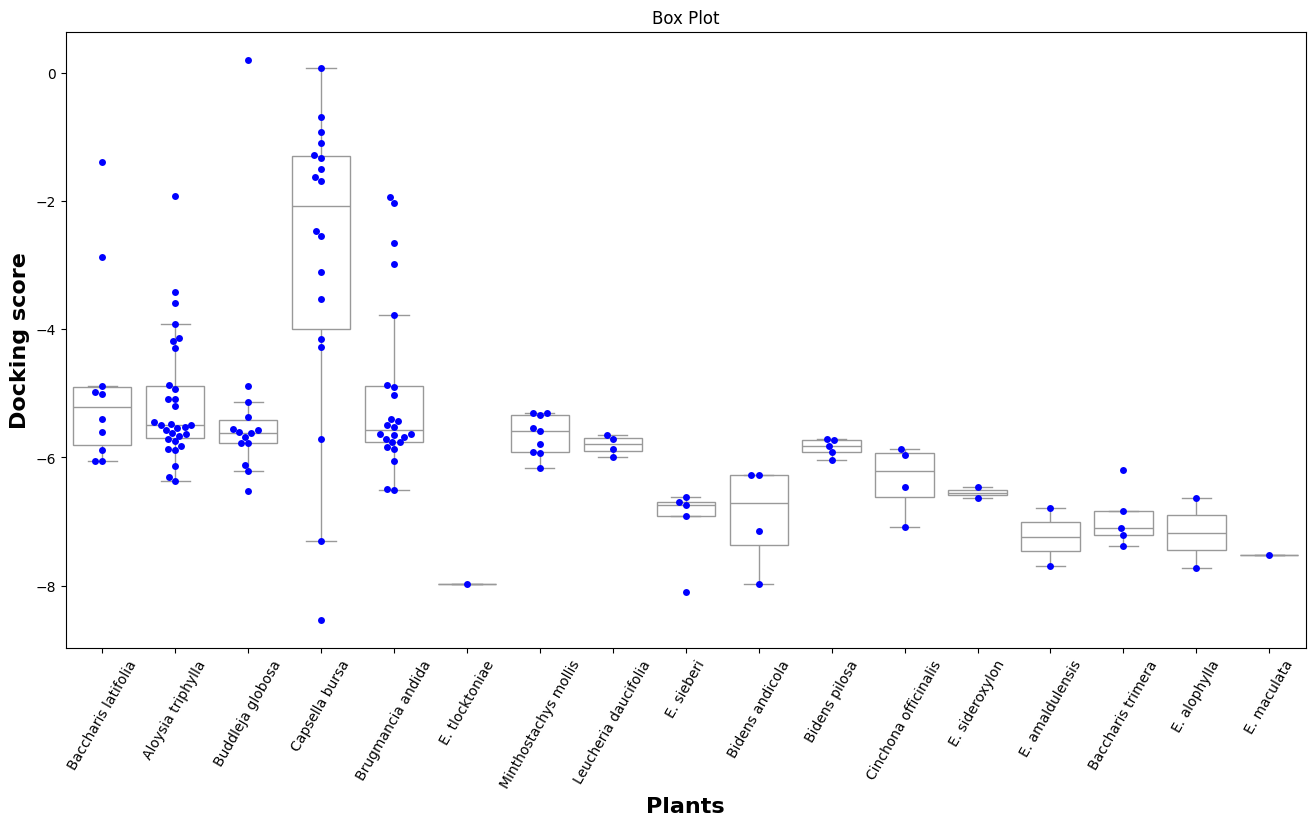

In [ ]:
import pandas as pd
import seaborn as sns

fig = plt.figure(figsize=(16, 8))

###
ax = sns.boxplot(x='PLANT', y='docking score', data=df, ax=fig.add_subplot(1,1,1), showfliers=False, color='white')
sns.swarmplot(x='PLANT', y='docking score', data=df, ax=ax, color='blue', size=5)
###

# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# Agregar título de gráfica y etiquetas de eje
plt.title('Box Plot')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel('Plants', fontsize=16, fontweight='bold')
plt.ylabel('Docking score', rotation=90, fontsize=16, fontweight='bold')

# Mostrar la gráfica
plt.show();


# C. Análisis Exploratorio de los Datos (EDA)

In [ ]:
# BD de cancer
df = pd.read_csv("https://raw.githubusercontent.com/inefable12/C0708_Reconocimiento_Patrones_2024/main/cancer_challenge_cl2.csv", index_col=0)
df.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8    -1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   
2                 0.05999  ...          25.53            152.5      1709.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  

[3 rows x 31 columns]

# Conociendo la data:
1. ¿Cuántos datos hay?
2. ¿Qué atributos tenemos?
3. ¿Qué tipos de datos tenemos?
4. ¿Tenemos valores faltantes?
5. ¿Cómo están distribuidos los datos?
6. ¿Hay valores extraños?
7. ¿Qué información tiene el target?
8. ¿Cuales y cuantas etiquetas tiene?
9. ¿Cómo están correlacionados los datos?
10. ¿Son útiles los datos correlacionados?

In [ ]:
#

# D. Preprocesamiento

1. Tratamiento de datos outliers
2. Normalización de la data

# E. Screening de ML

In [ ]:
# Sugerencia: lazypredict o pycaret

In [ ]:
# Ejemplo complementario
# https://colab.research.google.com/drive/1jntqMDjquG7j2sC-W-koWTaaQLrPnZ5T?authuser=7&pli=1#scrollTo=xZo2J8hRSy72

# F. Challenge

**Problemática**:

Existen moléculas con capacidad de permear a la membrana celular, esta es una característica importante en el desarrollo de fármacos. Sin embargo, en las células existen canales (proteínas) que permiten la entrada de moléculas específicas que no dependen de esta capacidad. Por ejemplo, la proteína FoxA, situada en la membrana bacterial, se "encarga" de la entrada de hierro (Fe3+).
Este metal es altamente reactivo, por lo cual, se encuentra "protegido" por una molécula orgánica, llamada sideróforo, producida por las mismas bacterias. Los microorganismos reconocen químicamente el sideróforo y se inicia la internalización del hierro-sideróforo a través del canal. La imitación de sideróforos es una vía ampliamente usada para el descubrimiento de nuevos fármacos con limitada capacidad de permeabilidad celular.

En el laboratorio desarrollamos una base de datos para cuantificar el reconocimiento molecular de hierro-sideróforos (ligando) en FoxA (receptor):
https://github.com/inefable12/fedfo_720/blob/main/FULLc.csv

FEBc (Free Energy Binding) es un indicador de la afinidad entre el ligando y el receptor. Cuanto más negativo FEBc, es mayor la afinidad.

**Objetivos**:

General: Aplicar EDA y preprocesamiento del dataset para la predicción de FEBc.

Específicos:

1. Identificar el tipo de modelo (agrupamiento, regresion, clasificacion, etc)
2. Justificar cada paso del EDA, destacando la utilidad de la información obtenida.
3. Realizar preprocesamiento a los datos
4. Realizar un screening de modelos de ML (pycaret, lazy predict, etc)
5. Analizar las métricas
6. Conclusiones.

**Estudiante: Daniel Ivan Zavaleta Guzmán**

###Análisis exploratorio de datos

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [44]:
!pip install lazypredict


In [45]:
from lazypredict.Supervised import LazyRegressor
from sklearn.neighbors import LocalOutlierFactor


In [46]:
df = pd.read_csv("/content/FULLc.csv", index_col=0)
df #para observar lo que hay en el dataset

r_mopac_Alpha_SOMO_Energy  \
r_mopac_Alpha_LUMO_Energy                              
-3.97                                          -9.47   
-4.06                                          -9.47   
-3.96                                          -9.60   
-2.69                                         -10.85   
-2.56                                         -10.66   
...                                              ...   
-4.08                                          -9.58   
-2.39                                         -10.20   
-2.86                                         -11.23   
-2.41                                         -10.10   
-2.43                                         -10.88   

                           r_mopac_Beta_LUMO_Energy  r_mopac_Beta_SOMO_Energy  \
r_mopac_Alpha_LUMO_Energy                                                       
-3.97                                         -3.97                     -9.44   
-4.06                                         -4.06                     -9.80   
-3.96                                         -3.96                     -9.97   
-2.69                                         -2.68                    -10.77   
-2.56                                         -2.59                    -11.07   
...                                             ...                       ...   
-4.08                                         -4.08                     -9.76   
-2.39                                         -2.39                    -10.32   
-2.86                                         -2.79                    -11.26   
-2.41                                         -2.41                    -10.02   
-2.43                                         -2.42                    -10.93   

                           r_mopac_Dipole  r_mopac_Dipole_X  r_mopac_Dipole_Y  \
r_mopac_Alpha_LUMO_Energy                                                       
-3.97                               40.43              0.15            -38.41   
-4.06                               39.06             -3.59             33.12   
-3.96                               38.68            -11.33            -29.60   
-2.69                               11.91              3.25             -9.45   
-2.56                               13.12             -5.02             -7.40   
...                                   ...               ...               ...   
-4.08                               36.06            -14.43            -32.75   
-2.39                               16.94             13.66             -5.60   
-2.86                               10.83              2.91              4.12   
-2.41                               24.94             -6.09            -24.08   
-2.43                               12.02              0.83              4.37   

                           r_mopac_Dipole_Z  r_mopac_Ionization_Energy  \
r_mopac_Alpha_LUMO_Energy                                                
-3.97                                 12.61                       9.44   
-4.06                                 20.39                       9.47   
-3.96                                -22.18                       9.59   
-2.69                                  6.48                      10.77   
-2.56                                 -9.60                      10.66   
...                                     ...                        ...   
-4.08                                  4.43                       9.58   
-2.39                                  8.30                      10.20   
-2.86                                 -9.59                      11.23   
-2.41                                 -2.20                      10.01   
-2.43                                -11.17                      10.88   

                           r_mopac_MOPAC_Heat_of_Formation  \
r_mopac_Alpha_LUMO_Energy                                    
-3.97                                              -221.86   
-4.06                                    

El valor FEBc es el target en este dataset de acuerdo a la problematica.

In [47]:
df.columns #verificando las columnas del dataframe

Index(['r_mopac_Alpha_SOMO_Energy', 'r_mopac_Beta_LUMO_Energy',
       'r_mopac_Beta_SOMO_Energy', 'r_mopac_Dipole', 'r_mopac_Dipole_X',
       'r_mopac_Dipole_Y', 'r_mopac_Dipole_Z', 'r_mopac_Ionization_Energy',
       'r_mopac_MOPAC_Heat_of_Formation', 'r_mopac_MOPAC_Total_Energy_EV',
       'i_desc_Chirality_count', 'PBF', 'PMI1', 'PMI2', 'PMI3', 'NPR1', 'NPR2',
       'RadiusOfGyration', 'InertialShapeFactor', 'Eccentricity',
       'Asphericity', 'SpherocityIndex', 'FEBc'],
      dtype='object')

In [48]:
df.dtypes #se corroboran los tipos de valores que tiene cada feature dentro del dataset

r_mopac_Alpha_SOMO_Energy          float64
r_mopac_Beta_LUMO_Energy           float64
r_mopac_Beta_SOMO_Energy           float64
r_mopac_Dipole                     float64
r_mopac_Dipole_X                   float64
r_mopac_Dipole_Y                   float64
r_mopac_Dipole_Z                   float64
r_mopac_Ionization_Energy          float64
r_mopac_MOPAC_Heat_of_Formation    float64
r_mopac_MOPAC_Total_Energy_EV      float64
i_desc_Chirality_count               int64
PBF                                float64
PMI1                               float64
PMI2                               float64
PMI3                               float64
NPR1                               float64
NPR2                               float64
RadiusOfGyration                   float64
InertialShapeFactor                float64
Eccentricity                       float64
Asphericity                        float64
SpherocityIndex                    float64
FEBc                               float64
dtype: obje

In [49]:
df.isna().any() #se corrobora que no se tiene valores nulos, por lo que no se elimina ninguna fila del dataset

r_mopac_Alpha_SOMO_Energy          False
r_mopac_Beta_LUMO_Energy           False
r_mopac_Beta_SOMO_Energy           False
r_mopac_Dipole                     False
r_mopac_Dipole_X                   False
r_mopac_Dipole_Y                   False
r_mopac_Dipole_Z                   False
r_mopac_Ionization_Energy          False
r_mopac_MOPAC_Heat_of_Formation    False
r_mopac_MOPAC_Total_Energy_EV      False
i_desc_Chirality_count             False
PBF                                False
PMI1                               False
PMI2                               False
PMI3                               False
NPR1                               False
NPR2                               False
RadiusOfGyration                   False
InertialShapeFactor                False
Eccentricity                       False
Asphericity                        False
SpherocityIndex                    False
FEBc                               False
dtype: bool

In [50]:
#ahora, se verifica con datos estadisticos la distribucion de la data

In [51]:
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T #medidas estadisticas de la data

count     mean     std      min      10%  \
r_mopac_Alpha_SOMO_Energy       720.00   -10.27    0.73   -11.96   -11.25   
r_mopac_Beta_LUMO_Energy        720.00    -3.37    0.68    -4.36    -4.08   
r_mopac_Beta_SOMO_Energy        720.00   -10.39    0.66   -11.77   -11.31   
r_mopac_Dipole                  720.00    25.44   12.83     1.07     9.22   
r_mopac_Dipole_X                720.00    -0.04    7.78   -20.08   -10.52   
r_mopac_Dipole_Y                720.00     0.84   22.43   -42.87   -31.74   
r_mopac_Dipole_Z                720.00    -0.23   15.74   -33.70   -21.32   
r_mopac_Ionization_Energy       720.00    10.21    0.68     8.82     9.47   
r_mopac_MOPAC_Heat_of_Formation 720.00  -242.12   23.82  -298.51  -274.18   
r_mopac_MOPAC_Total_Energy_EV   720.00 -7566.07    0.81 -7568.18 -7567.13   
i_desc_Chirality_count          720.00     1.52    0.89     0.00     0.00   
PBF                             720.00     1.05    0.24     0.00     0.86   
PMI1                            720.00  4808.45 1147.58     0.00  3296.06   
PMI2                            720.00 11071.35 6992.20     0.00  6991.80   
PMI3                            720.00 14358.12 6582.05     0.00 10378.21   
NPR1                            720.00     0.37    0.14     0.00     0.13   
NPR2                            720.00     0.72    0.15     0.00     0.63   
RadiusOfGyration                720.00     4.81    1.15     0.00     4.31   
InertialShapeFactor             720.00     0.00    0.00     0.00     0.00   
Eccentricity                    720.00     0.89    0.15     0.00     0.86   
Asphericity                     720.00     0.29    0.18     0.00     0.15   
SpherocityIndex                 720.00     0.18    0.08     0.00     0.08   
FEBc                            720.00    -9.31    1.63   -13.50   -11.30   

                                     25%      50%      75%      90%      95%  \
r_mopac_Alpha_SOMO_Energy         -10.94   -10.07    -9.58    -9.48    -9.42   
r_mopac_Beta_LUMO_Energy           -4.01    -3.74    -2.69    -2.44    -2.38   
r_mopac_Beta_SOMO_Energy          -11.08   -10.16    -9.81    -9.65    -9.58   
r_mopac_Dipole                     13.15    24.57    38.13    41.20    42.50   
r_mopac_Dipole_X                   -4.83     0.01     4.62    10.51    13.36   
r_mopac_Dipole_Y                  -18.77     0.82    21.88    31.47    34.60   
r_mopac_Dipole_Z                  -12.81    -0.52    12.21    21.20    25.19   
r_mopac_Ionization_Energy           9.57    10.02    10.86    11.16    11.26   
r_mopac_MOPAC_Heat_of_Formation  -264.95  -231.23  -223.14  -216.17  -210.40   
r_mopac_MOPAC_Total_Energy_EV   -7566.74 -7565.71 -7565.45 -7565.23 -7564.92   
i_desc_Chirality_count              1.00     2.00     2.00     3.00     3.00   
PBF                                 0.94     1.05     1.16     1.32     1.43   
PMI1                             4595.82  5065.91  5456.12  5760.74  5909.58   
PMI2                             7502.53  8226.45 11856.25 21164.13 26469.46   
PMI3                            11134.45 11857.02 16302.91 23343.39 27770.22   
NPR1                                0.32     0.42     0.47     0.51     0.54   
NPR2                                0.66     0.71     0.76     0.93     0.96   
RadiusOfGyration                    4.39     4.51     5.23     6.23     6.79   
InertialShapeFactor                 0.00     0.00     0.00     0.00     0.00   
Eccentricity                        0.88     0.91     0.94     0.99     0.99   
Asphericity                         0.19     0.23     0.31     0.60     0.70   
SpherocityIndex                     0.12     0.17     0.22     0.28     0.33   
FEBc                              -10.30    -9.60    -8.30    -7.20    -6.60   

                                     99%      max  
r_mopac_Alpha_SOMO_Energy          -9.26    -9.13  
r_mopac_Beta_LUMO_Energy           -2.26    -2.00  
r_mopac_Beta_SOMO_Energy           -9.31    -8.82  
r_mopac_Dipole                     44.38    46.41  
r_m

In [52]:
#Ahora, para detectar redundancia entre features, y también reducir dimensionalidad,
#se hace una estudio de correlación

<Axes: >

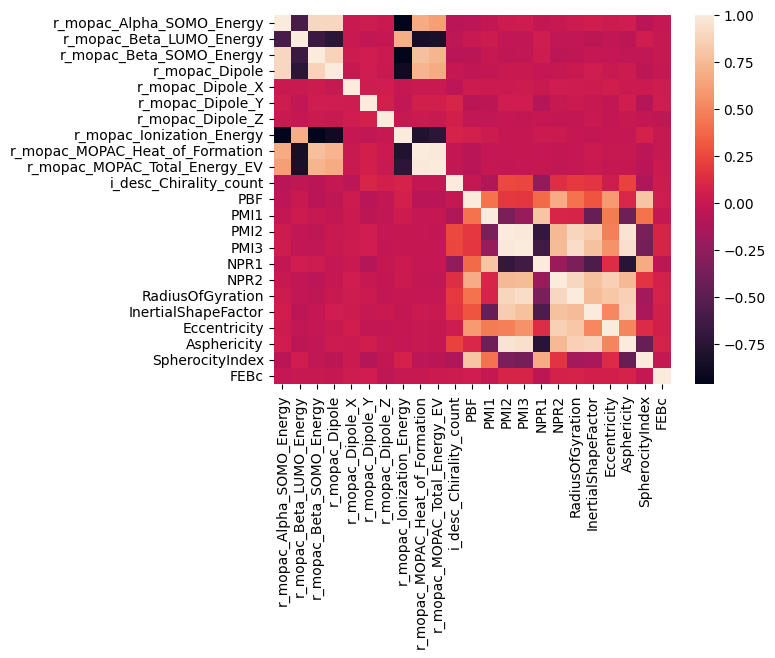

In [53]:
plt.figure()
sns.heatmap(df.corr())

In [54]:
#se extraen los features con correlacion mayor a 0.9 para no tener redundancia
corr_mat = df.corr()
columns = np.full((corr_mat.shape[0], ), True, dtype=bool)
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]
df

r_mopac_Alpha_SOMO_Energy  \
r_mopac_Alpha_LUMO_Energy                              
-3.97                                          -9.47   
-4.06                                          -9.47   
-3.96                                          -9.60   
-2.69                                         -10.85   
-2.56                                         -10.66   
...                                              ...   
-4.08                                          -9.58   
-2.39                                         -10.20   
-2.86                                         -11.23   
-2.41                                         -10.10   
-2.43                                         -10.88   

                           r_mopac_Beta_LUMO_Energy  r_mopac_Dipole  \
r_mopac_Alpha_LUMO_Energy                                             
-3.97                                         -3.97           40.43   
-4.06                                         -4.06           39.06   
-3.96                                         -3.96           38.68   
-2.69                                         -2.68           11.91   
-2.56                                         -2.59           13.12   
...                                             ...             ...   
-4.08                                         -4.08           36.06   
-2.39                                         -2.39           16.94   
-2.86                                         -2.79           10.83   
-2.41                                         -2.41           24.94   
-2.43                                         -2.42           12.02   

                           r_mopac_Dipole_X  r_mopac_Dipole_Y  \
r_mopac_Alpha_LUMO_Energy                                       
-3.97                                  0.15            -38.41   
-4.06                                 -3.59             33.12   
-3.96                                -11.33            -29.60   
-2.69                                  3.25             -9.45   
-2.56                                 -5.02             -7.40   
...                                     ...               ...   
-4.08                                -14.43            -32.75   
-2.39                                 13.66             -5.60   
-2.86                                  2.91              4.12   
-2.41                                 -6.09            -24.08   
-2.43                                  0.83              4.37   

                           r_mopac_Dipole_Z  r_mopac_Ionization_Energy  \
r_mopac_Alpha_LUMO_Energy                                                
-3.97                                 12.61                       9.44   
-4.06                                 20.39                       9.47   
-3.96                                -22.18                       9.59   
-2.69                                  6.48                      10.77   
-2.56                                 -9.60                      10.66   
...                                     ...                        ...   
-4.08                                  4.43                       9.58   
-2.39                                  8.30                      10.20   
-2.86                                 -9.59                      11.23   
-2.41                                 -2.20                      10.01   
-2.43                                -11.17                      10.88   

                           r_mopac_MOPAC_Heat_of_Formation  \
r_mopac_Alpha_LUMO_Energy                                    
-3.97                                              -221.86   
-4.06                                              -222.34   
-3.96                                              -224.24   
-2.69                                              -264.35   
-2.56                                              -257.23   
...                                                    ...   
-4.08                                              -224.60   
-2.39  

In [55]:
#Se redujo la cantidad de features de 22 a 17.

<Axes: >

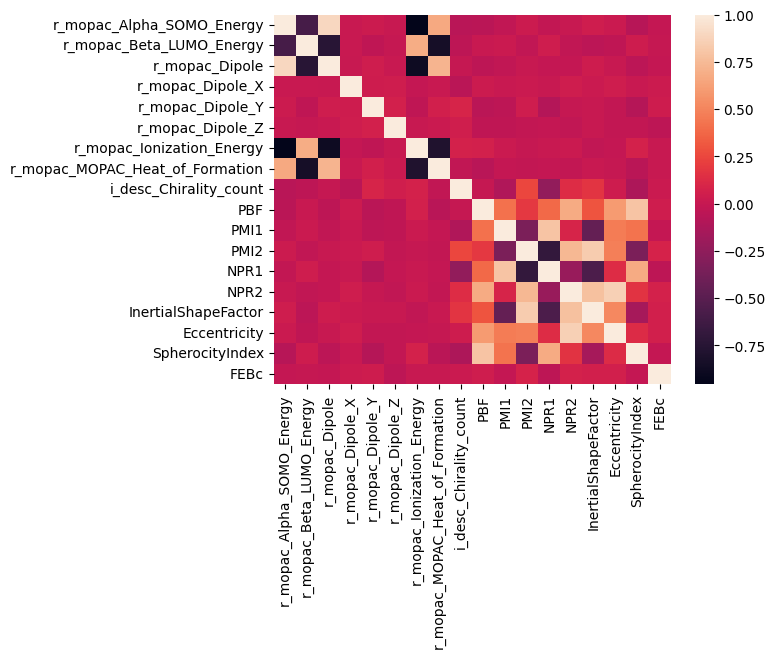

In [56]:
sns.heatmap(df.corr(), annot=False)

In [57]:
#Para ver la distribucion de los valores de cada feature se usa histogramas

array([[<Axes: title={'center': 'r_mopac_Alpha_SOMO_Energy'}>,
        <Axes: title={'center': 'r_mopac_Beta_LUMO_Energy'}>,
        <Axes: title={'center': 'r_mopac_Dipole'}>,
        <Axes: title={'center': 'r_mopac_Dipole_X'}>],
       [<Axes: title={'center': 'r_mopac_Dipole_Y'}>,
        <Axes: title={'center': 'r_mopac_Dipole_Z'}>,
        <Axes: title={'center': 'r_mopac_Ionization_Energy'}>,
        <Axes: title={'center': 'r_mopac_MOPAC_Heat_of_Formation'}>],
       [<Axes: title={'center': 'i_desc_Chirality_count'}>,
        <Axes: title={'center': 'PBF'}>,
        <Axes: title={'center': 'PMI1'}>,
        <Axes: title={'center': 'PMI2'}>],
       [<Axes: title={'center': 'NPR1'}>,
        <Axes: title={'center': 'NPR2'}>,
        <Axes: title={'center': 'InertialShapeFactor'}>,
        <Axes: title={'center': 'Eccentricity'}>],
       [<Axes: title={'center': 'SpherocityIndex'}>,
        <Axes: title={'center': 'FEBc'}>, <Axes: >, <Axes: >]],
      dtype=object)

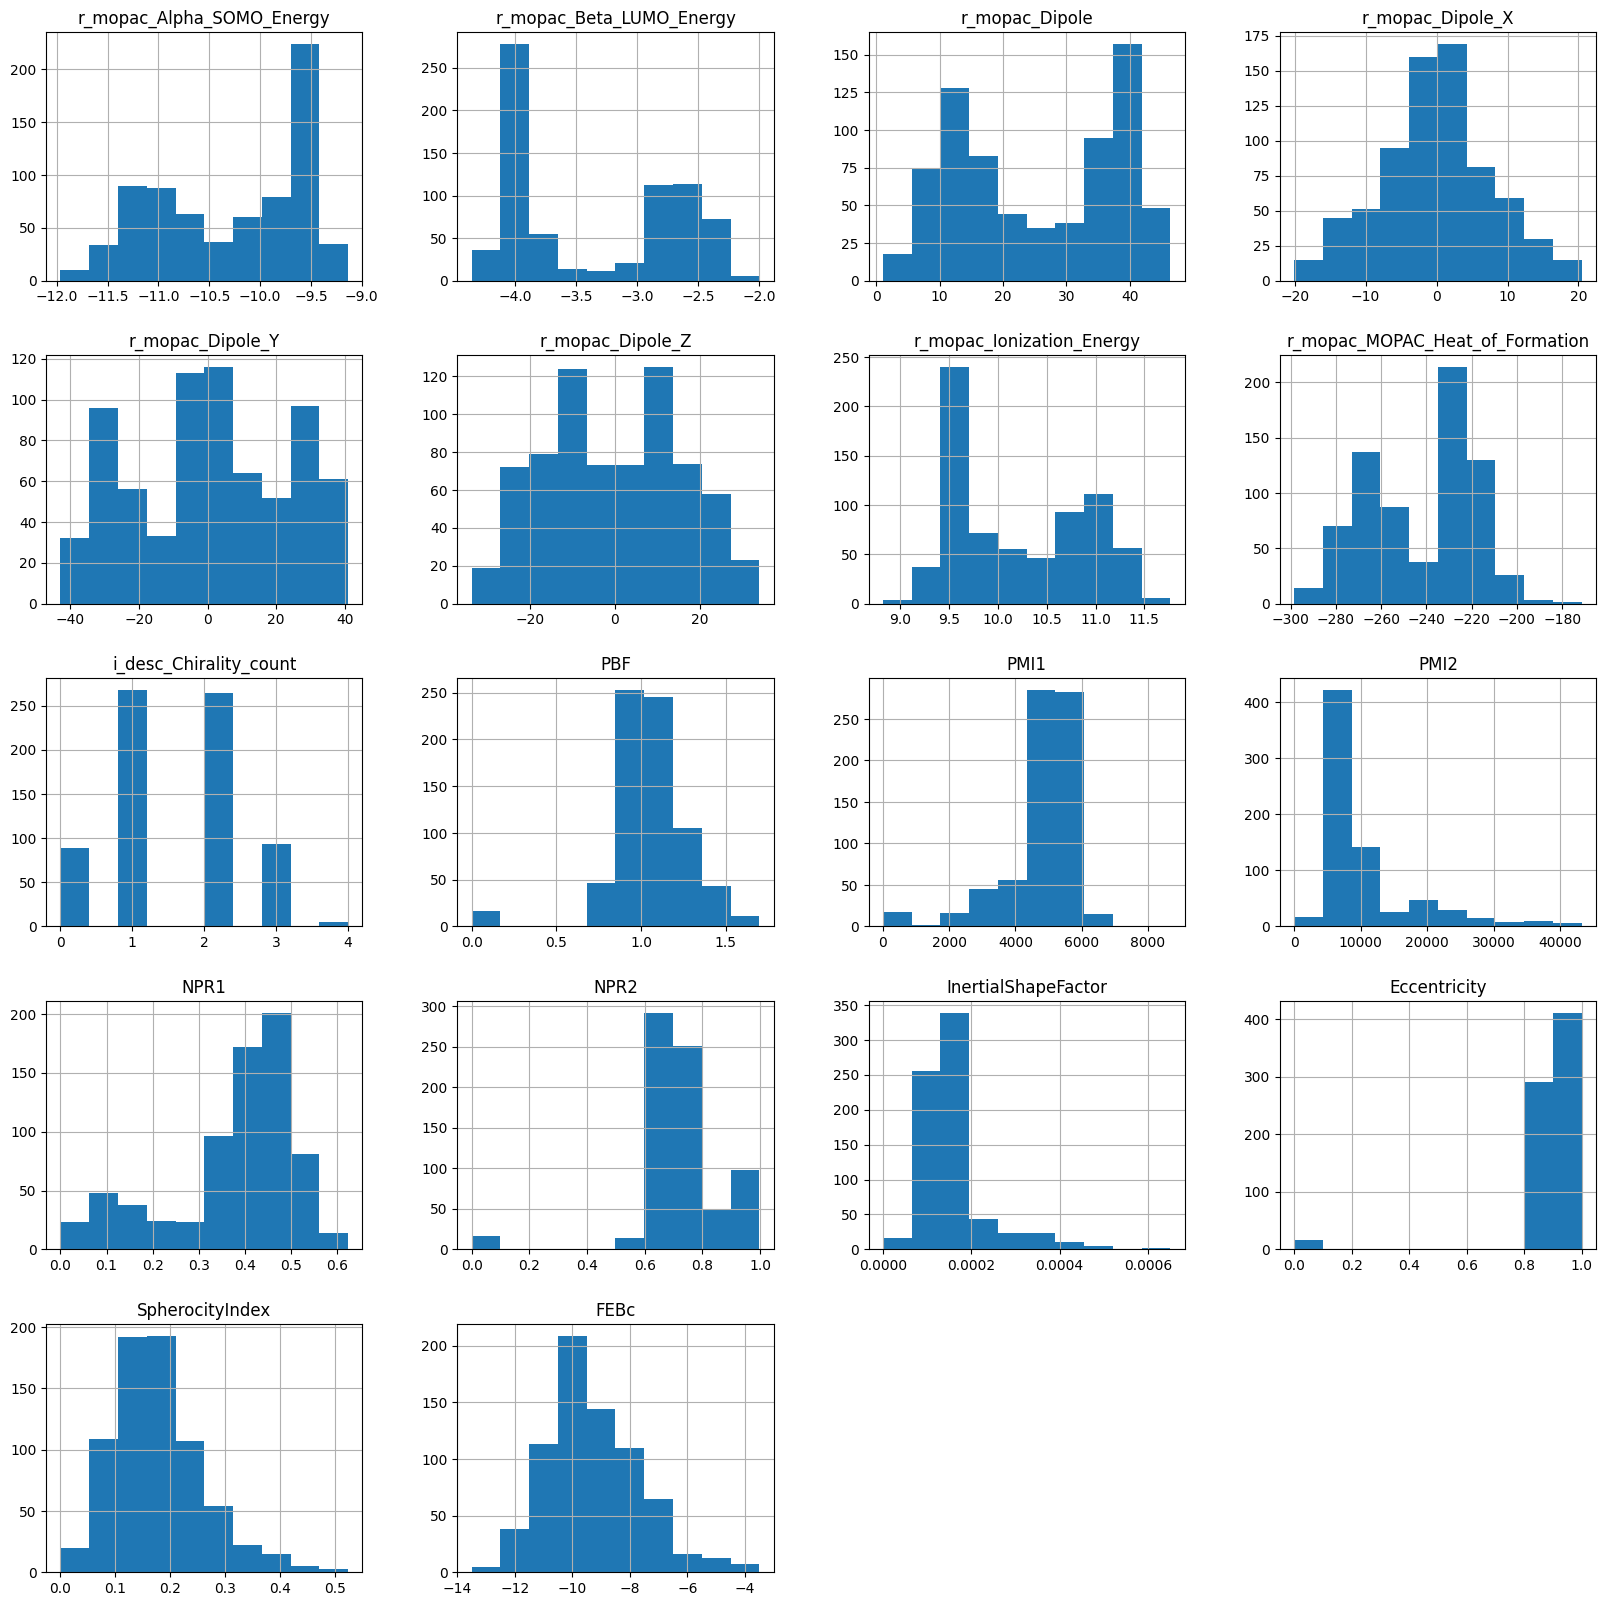

In [58]:
df.hist(figsize=(20, 20))

###Preprocesamiento de datos

In [59]:
#Se revisa de nuevo si todavía hay algun valor nulo en el dataset
df.isnull().sum()

r_mopac_Alpha_SOMO_Energy          0
r_mopac_Beta_LUMO_Energy           0
r_mopac_Dipole                     0
r_mopac_Dipole_X                   0
r_mopac_Dipole_Y                   0
r_mopac_Dipole_Z                   0
r_mopac_Ionization_Energy          0
r_mopac_MOPAC_Heat_of_Formation    0
i_desc_Chirality_count             0
PBF                                0
PMI1                               0
PMI2                               0
NPR1                               0
NPR2                               0
InertialShapeFactor                0
Eccentricity                       0
SpherocityIndex                    0
FEBc                               0
dtype: int64

In [60]:
#Se revisa si hay outliers en los features del dataset

In [61]:
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    if df[(df[feature] > upper)].any(axis=None):
        print(feature, "yes")
    else: print(feature, "no")

r_mopac_Alpha_SOMO_Energy no
r_mopac_Beta_LUMO_Energy no
r_mopac_Dipole no
r_mopac_Dipole_X yes
r_mopac_Dipole_Y no
r_mopac_Dipole_Z no
r_mopac_Ionization_Energy no
r_mopac_MOPAC_Heat_of_Formation no
i_desc_Chirality_count yes
PBF yes
PMI1 yes
PMI2 yes
NPR1 no
NPR2 yes
InertialShapeFactor yes
Eccentricity no
SpherocityIndex yes
FEBc yes


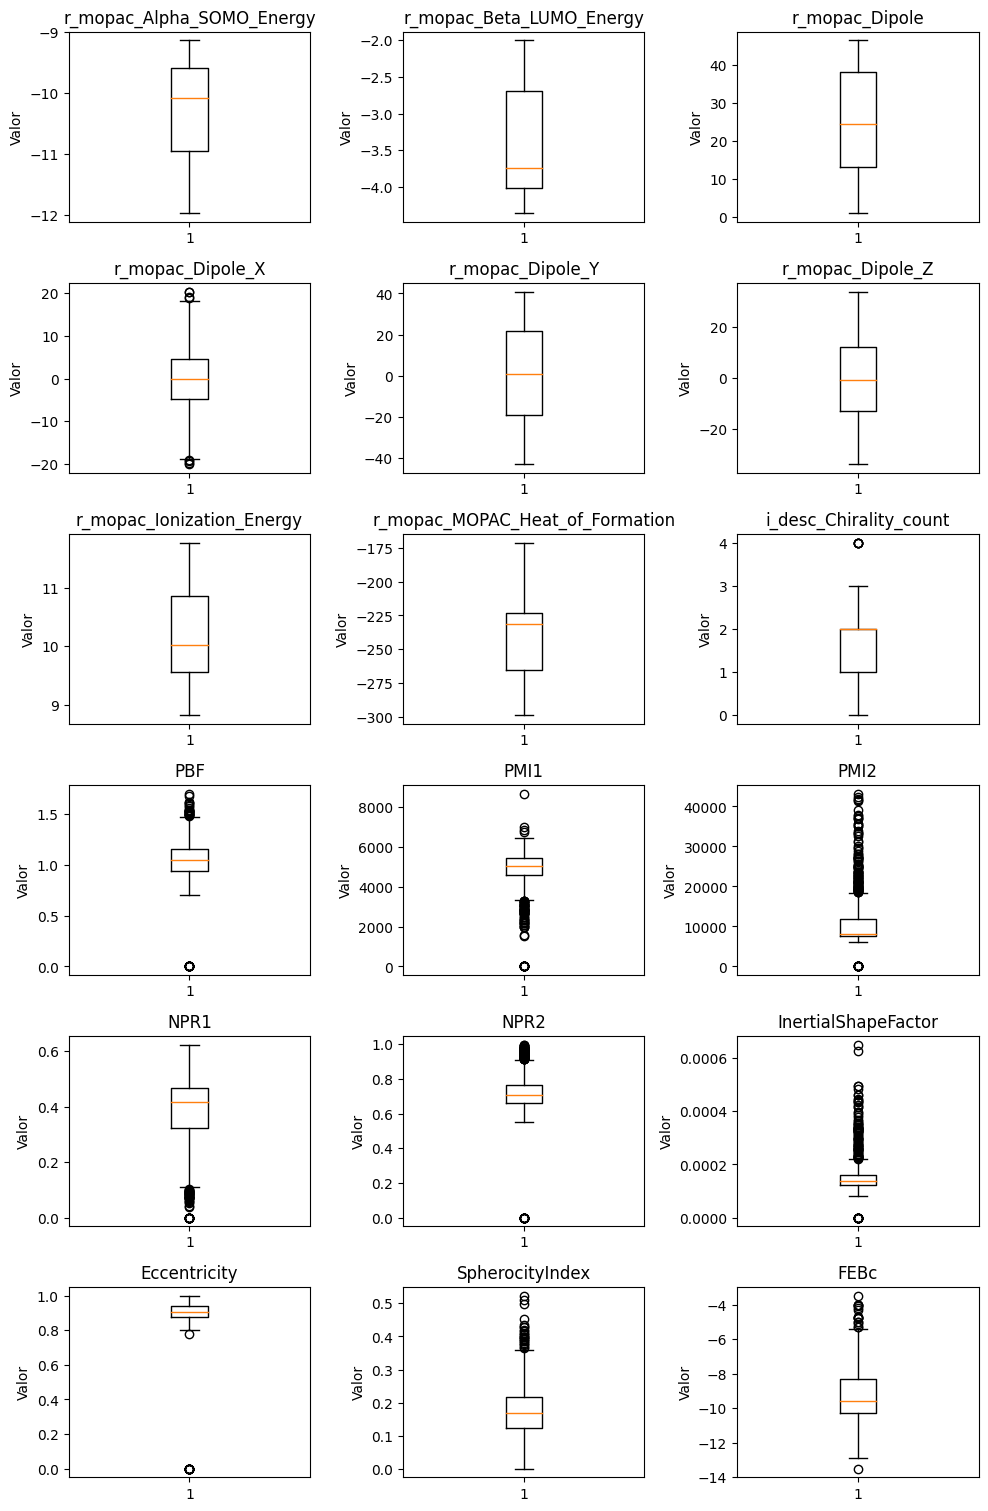

In [62]:
#Se visualiza la distribucion de variables de cada feature con Boxplots

plt.figure(figsize=(10, 20))
for i, col in enumerate(df.columns, 1):
    plt.subplot(8, 3, i)
    plt.boxplot(df[col])
    plt.title(col)
    plt.ylabel('Valor')

plt.tight_layout()
plt.show()

In [63]:
#Considerando outliers como los que están fuera del intervalo [Q1-3*IQR, Q3+3*IQR]
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 3*IQR
    upper = Q3 + 3*IQR
    df = df[df[feature] > lower]
    df = df[df[feature] < upper]
df

r_mopac_Alpha_SOMO_Energy  \
r_mopac_Alpha_LUMO_Energy                              
-3.97                                          -9.47   
-4.06                                          -9.47   
-3.96                                          -9.60   
-2.69                                         -10.85   
-2.56                                         -10.66   
...                                              ...   
-2.96                                         -11.41   
-2.43                                         -10.26   
-4.08                                          -9.58   
-2.39                                         -10.20   
-2.43                                         -10.88   

                           r_mopac_Beta_LUMO_Energy  r_mopac_Dipole  \
r_mopac_Alpha_LUMO_Energy                                             
-3.97                                         -3.97           40.43   
-4.06                                         -4.06           39.06   
-3.96                                         -3.96           38.68   
-2.69                                         -2.68           11.91   
-2.56                                         -2.59           13.12   
...                                             ...             ...   
-2.96                                         -2.89           13.90   
-2.43                                         -2.43           21.57   
-4.08                                         -4.08           36.06   
-2.39                                         -2.39           16.94   
-2.43                                         -2.42           12.02   

                           r_mopac_Dipole_X  r_mopac_Dipole_Y  \
r_mopac_Alpha_LUMO_Energy                                       
-3.97                                  0.15            -38.41   
-4.06                                 -3.59             33.12   
-3.96                                -11.33            -29.60   
-2.69                                  3.25             -9.45   
-2.56                                 -5.02             -7.40   
...                                     ...               ...   
-2.96                                 -8.59              8.44   
-2.43                                  7.08            -20.20   
-4.08                                -14.43            -32.75   
-2.39                                 13.66             -5.60   
-2.43                                  0.83              4.37   

                           r_mopac_Dipole_Z  r_mopac_Ionization_Energy  \
r_mopac_Alpha_LUMO_Energy                                                
-3.97                                 12.61                       9.44   
-4.06                                 20.39                       9.47   
-3.96                                -22.18                       9.59   
-2.69                                  6.48                      10.77   
-2.56                                 -9.60                      10.66   
...                                     ...                        ...   
-2.96                                 -6.94                      11.27   
-2.43                                  2.61                      10.09   
-4.08                                  4.43                       9.58   
-2.39                                  8.30                      10.20   
-2.43                                -11.17                      10.88   

                           r_mopac_MOPAC_Heat_of_Formation  \
r_mopac_Alpha_LUMO_Energy                                    
-3.97                                              -221.86   
-4.06                                              -222.34   
-3.96                                              -224.24   
-2.69                                              -264.35   
-2.56                                              -257.23   
...                                                    ...   
-2.96                                              -267.84   
-2.43  

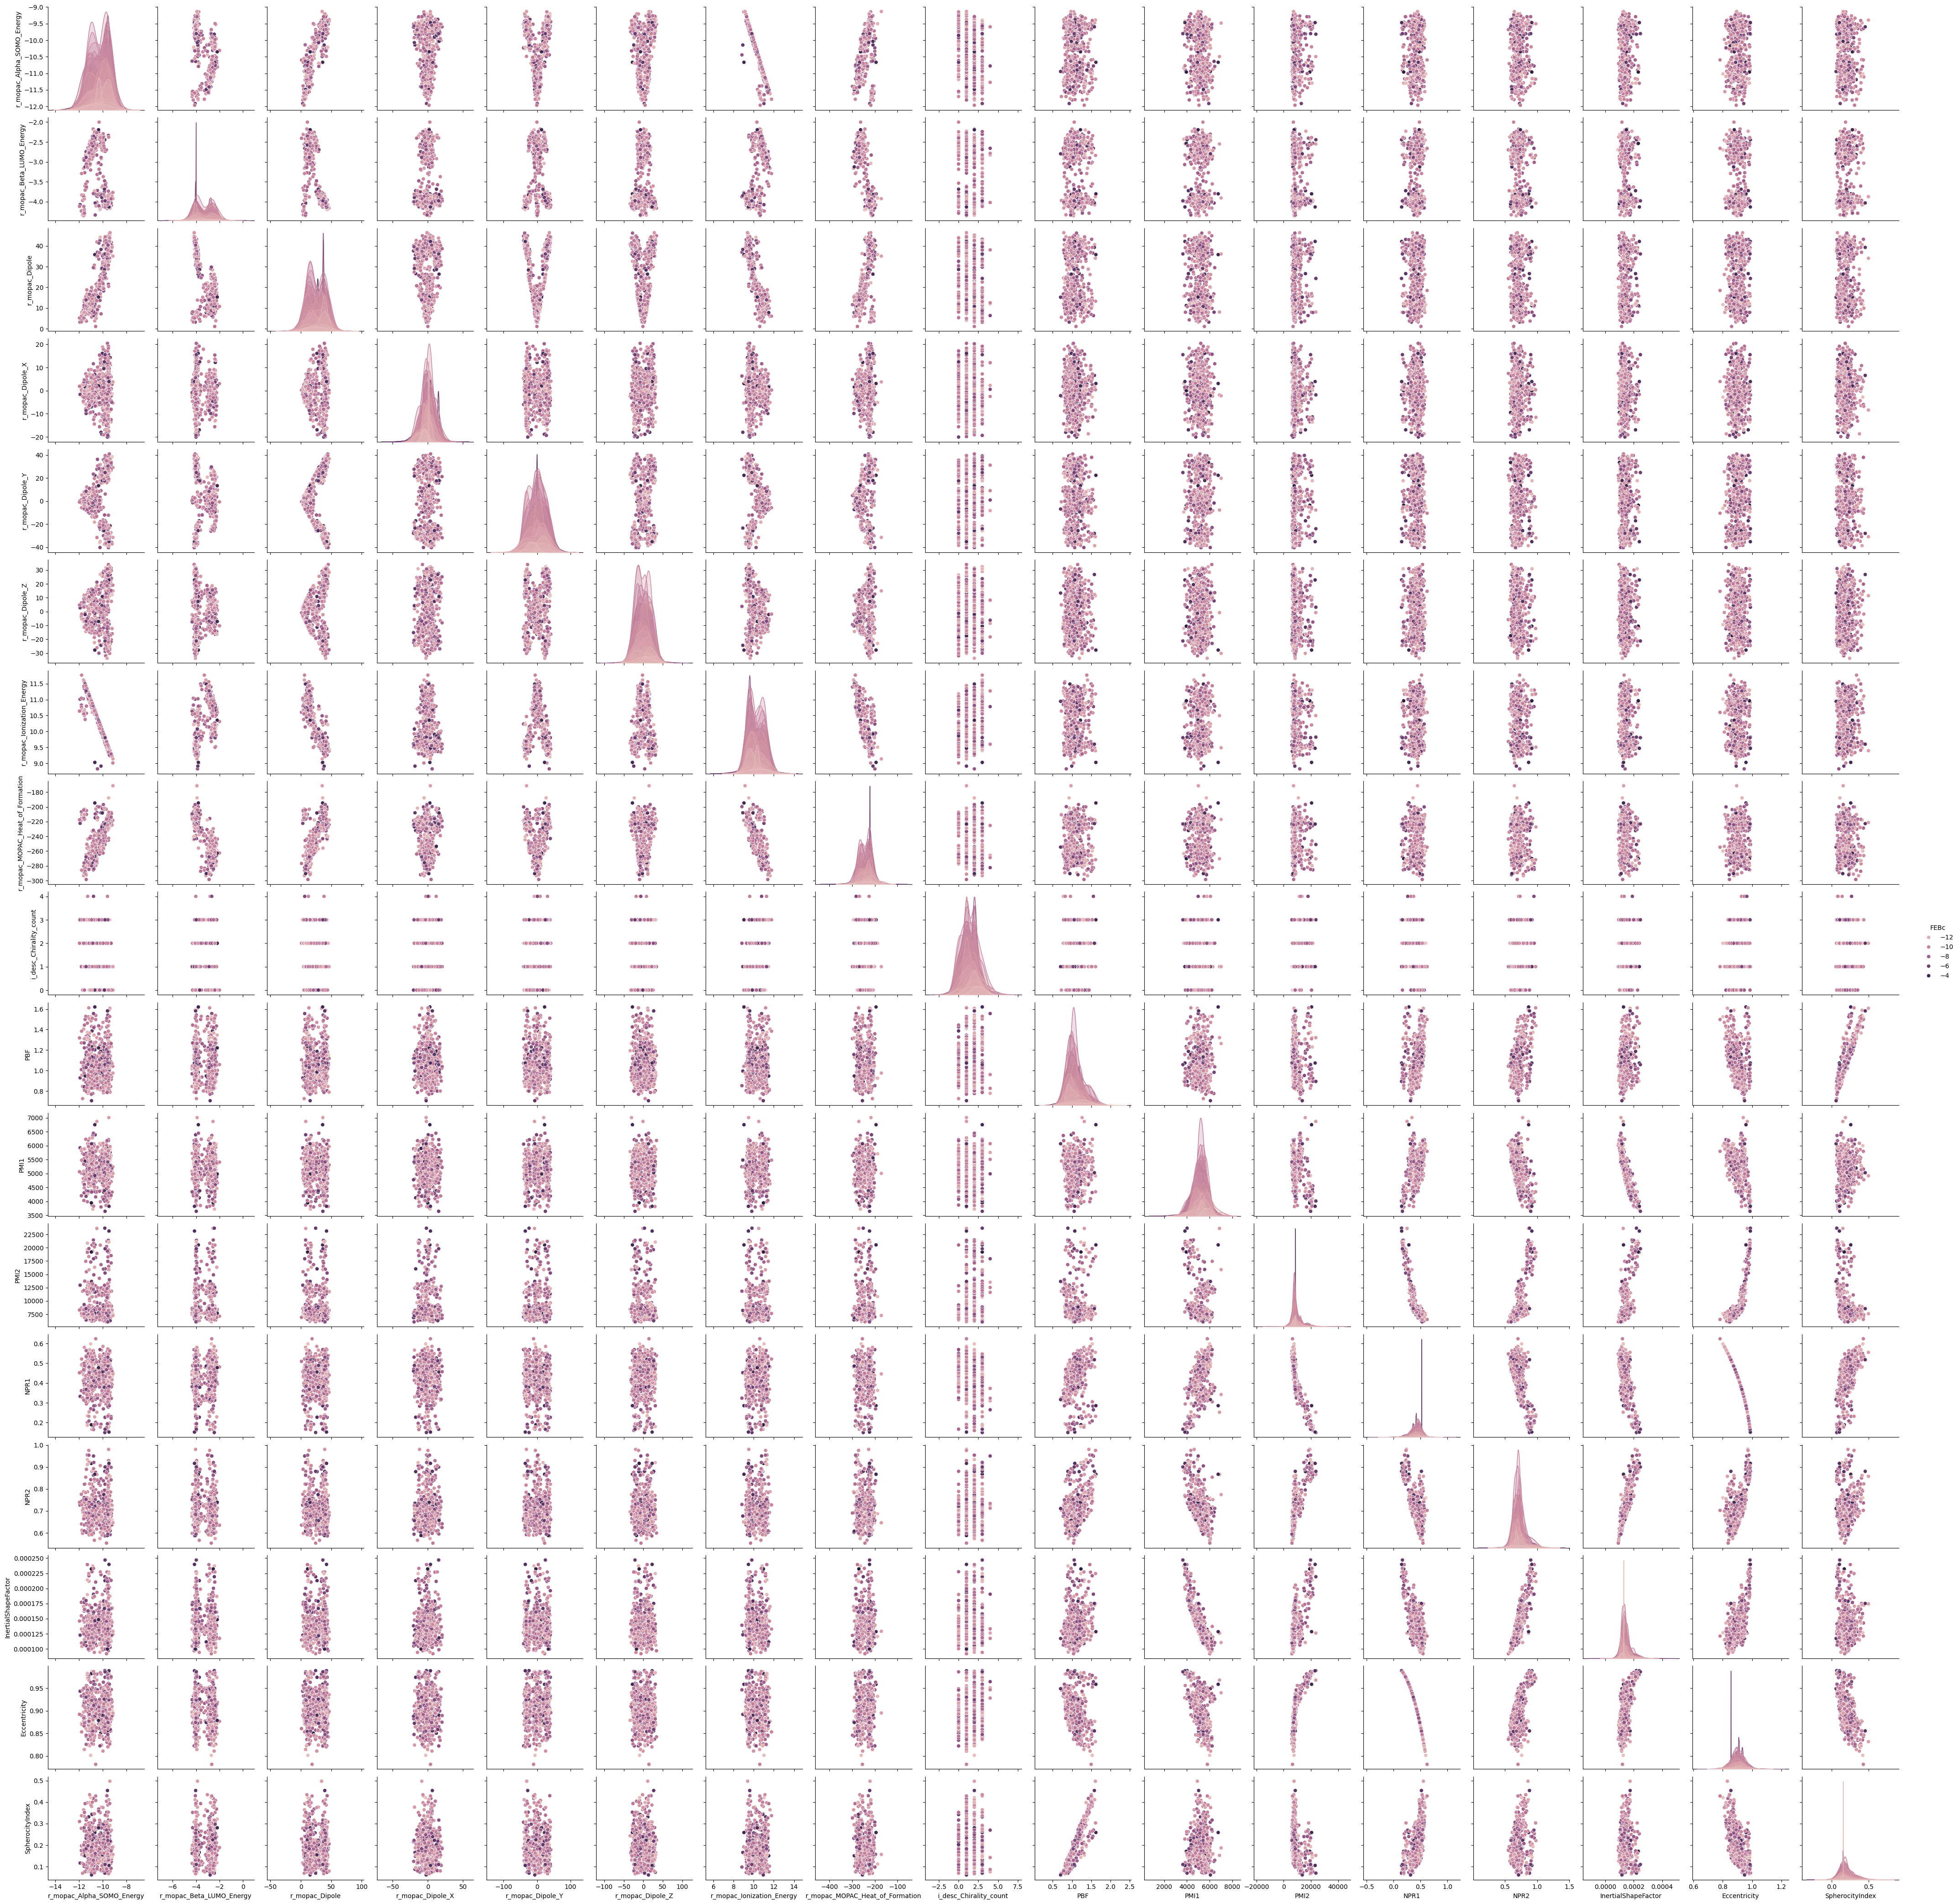

In [64]:
#se ve si hay distribucion de los features
sns.pairplot(df, hue="FEBc")

In [65]:
#Se quitan los outliers entre variables
lof = LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [66]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-2.77649558, -2.64669021, -2.38269115, -2.11809808, -2.07371845,
       -1.97114544, -1.86316913, -1.86224459, -1.85687399, -1.8134941 ,
       -1.8061542 , -1.76315509, -1.70063019, -1.66373174, -1.64386218,
       -1.60555955, -1.58642379, -1.54673667, -1.53356211, -1.52946002,
       -1.52216125, -1.51270861, -1.50571151, -1.5006158 , -1.49946741,
       -1.49335232, -1.46233795, -1.44382498, -1.4384689 , -1.40582151])

In [67]:
#valor umbral de lof scores
threshold = np.sort(df_scores)[7]

In [68]:
#eliminando los que son mayores
outlier = df_scores > threshold
df = df[outlier]

In [69]:
df.shape

(612, 18)

###Entrenamiento de modelo ML

In [70]:
from sklearn.model_selection import train_test_split
y = df["FEBc"]
X = df.drop(columns=["FEBc"])

In [71]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize data
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [72]:
#Usando Lazy Predict para hallar mejores modelos para fine tuning
clf = LazyRegressor(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:04<00:00,  9.13it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2621
[LightGBM] [Info] Number of data points in the train set: 489, number of used features: 17
[LightGBM] [Info] Start training from score -9.379141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [73]:
#Se muestran los 10 mejores modelos en base a Lazy Predict
print(models.head(10))

                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
BayesianRidge                             -0.19      -0.02  1.68        0.03
LassoLars                                 -0.19      -0.02  1.68        0.01
DummyRegressor                            -0.19      -0.02  1.68        0.01
ElasticNet                                -0.19      -0.02  1.68        0.01
Lasso                                     -0.19      -0.02  1.68        0.01
ElasticNetCV                              -0.19      -0.02  1.68        0.21
LassoCV                                   -0.19      -0.02  1.68        0.25
LarsCV                                    -0.19      -0.02  1.68        0.08
LassoLarsCV                               -0.19      -0.02  1.68        0.03
OrthogonalMatchingPursuitCV               -0.20      -0.03  1.69        0.02


In [79]:
#Se puede observar que todos los modelos tienen valores de R cuadrado ajustado y R cuadrado cercanos a cero,
#lo cual indica que no se ha encontrado una buena relación entre los features y el target (FEBc) para que se puedan hacer
#predicciones precisas.

###Entrenamiento de modelo ML (parte 2)

In [80]:
#En base a lo anterior, se plantea realizar entrenamiento no supervisado

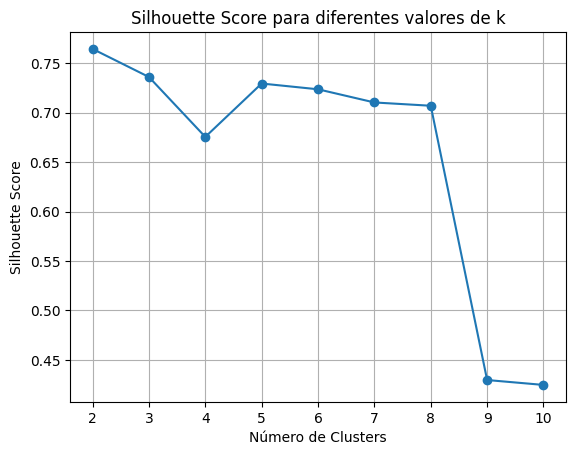

In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Carga de datos
data = pd.read_csv("/content/FULLc.csv")

X = data.drop(columns=['FEBc'])

#lista para almacenar los scores Silhouette
silhouette_scores = []

# Calculando el Silhouette Score para diferentes valores de k (número de clusters)
for k in range(2, 11):  # Probamos con un rango de 2 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualización del Silhouette Score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes valores de k')
plt.grid(True)
plt.show()


In [83]:
#Se ve que cuando el nro de clusters es entre 2 y 8, el score es mayor a 0.70.
#Esto sugiere que los datos pueden agruparse de manera efectiva en un número limitado de clusters,
#con una buena separación entre los puntos dentro de cada cluster y una clara distinción entre los clusters.

#Pero al agregar más clusters (nro de clusters 9 y 10) no mejora la estructura de los datos y
#podría llevar a divisiones innecesarias y menos significativas.

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Entrenamiento de K-Means para obtener los clusters
kmeans = KMeans(n_clusters=5, random_state=42) #se elige nro de clusters igual a 5
clusters = kmeans.fit_predict(X)

# Agregando la información de clusters como una nueva característica al DataFrame original
data['Cluster'] = clusters

# Separando los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['FEBc']), data['FEBc'], test_size=0.2, random_state=42)

# Entrenando un modelo de regresión (en este caso Random Forest Regressor) utilizando los clusters como características
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Prediccion de la variable objetivo en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Evaluacion del rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.5196830625


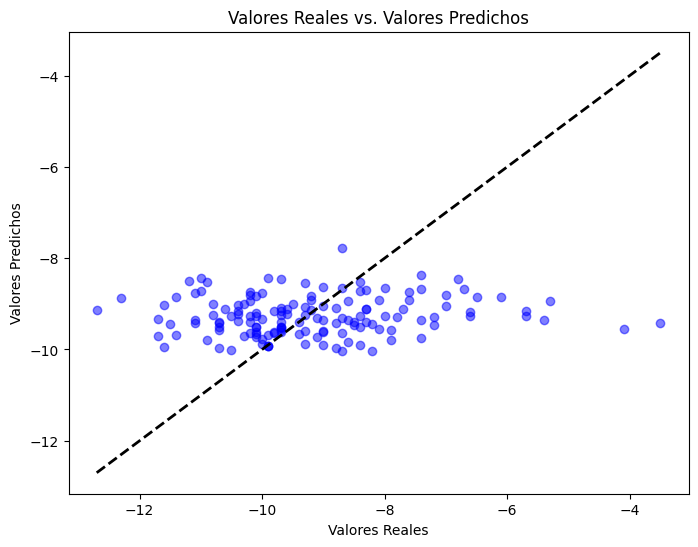

In [88]:
# Creando gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()


In [90]:
#Se observa que el modelo de ML empleado no genera una buena predicción, en base al grafico anterior.
#Y este grafico también corrobora los resultados obtenidos de lazy predict.